# Test Normal model implementation

In [29]:
import numpy as np
import pandas as pd
from option_models import bsm
from option_models import basket
from option_models import basket_Levy
from matplotlib import pyplot as plt

In [30]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'C:\\Users\\Jeremy\\Documents\\GitHub\\Project-team_asap\\option_models\\basket.py'>

weights: [1 0 0 0]
cor_m: 
 [[ 1.   0.2  0.2  0.2]
 [ 0.2  1.   0.2  0.2]
 [ 0.2  0.2  1.   0.2]
 [ 0.2  0.2  0.2  1. ]]
              bsm       levy         mc           gap
strike                                               
80      21.185930  21.185930  20.944631 -8.526513e-14
81      20.348379  20.348379  20.238692 -4.263256e-14
82      19.526455  19.526455  19.124848 -4.263256e-14
83      18.720866  18.720866  18.415646 -4.263256e-14
84      17.932279  17.932279  17.833287 -5.684342e-14
85      17.161318  17.161318  16.961974 -5.684342e-14
86      16.408558  16.408558  16.779479 -5.684342e-14
87      15.674521  15.674521  15.706301 -5.684342e-14
88      14.959672  14.959672  15.139296 -6.394885e-14
89      14.264418  14.264418  14.320287 -5.684342e-14
90      13.589108  13.589108  13.779246 -6.394885e-14
91      12.934027  12.934027  13.102217 -8.526513e-14
92      12.299398  12.299398  12.119941 -5.684342e-14
93      11.685384  11.685384  11.806479 -7.815970e-14
94      11.0920

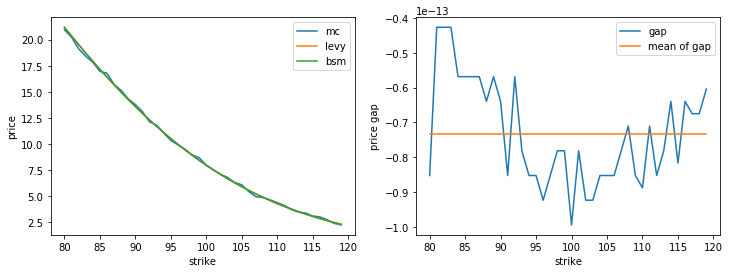

In [60]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights:',weights);print('cor_m: \n',cor_m)

strikeRange = np.arange(80,120,1)
bsmList=[]
mcList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(bsm.bsm_price(strike, spot[0], vol[0], texp, intr, divr[0], cp_sign=1))
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList,'bsm':bsmList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)
print ('-----std-----')
print (priceFrm.std())

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax1.plot(strikeRange,bsmList,label='bsm')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price gap')
plt.show()
# write your own normal model pricing here and compare
# do the similar for BSM model

In [62]:
#plot the outcome of the price gap under different conditions
def plotGap(mcList,levyList,var,varRange):
    priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList},index=varRange)
    priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
    priceFrm.index.name=var
    print (priceFrm)
    print ('-----std-----')
    print (priceFrm.std())
    fig=plt.figure(figsize=(12,4))
    ax1=fig.add_subplot(1,2,1)
    ax2=fig.add_subplot(1,2,2)
    ax1.plot(varRange,mcList,label='mc')
    ax1.plot(varRange,levyList,label='levy')
    ax2.plot(varRange,priceFrm.gap,label='gap')
    ax2.plot(varRange,[np.mean(priceFrm.gap)]*len(varRange),label='mean of gap')
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('price')
    ax2.set_ylabel('price gap')
    plt.show()

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.      0.9999  0.9999  0.9999]
 [ 0.9999  1.      0.9999  0.9999]
 [ 0.9999  0.9999  1.      0.9999]
 [ 0.9999  0.9999  0.9999  1.    ]]
             levy         mc       gap
strike                                
80      21.185787  20.727726  0.458061
81      20.348226  20.222087  0.126139
82      19.526291  19.580897 -0.054606
83      18.720690  18.520011  0.200679
84      17.932092  17.984431 -0.052339
85      17.161121  17.468022 -0.306902
86      16.408350  16.012844  0.395506
87      15.674303  16.012388 -0.338085
88      14.959444  14.765282  0.194162
89      14.264181  14.140971  0.123211
90      13.588862  13.647930 -0.059067
91      12.933772  13.059375 -0.125603
92      12.299136  12.301064 -0.001928
93      11.685115  11.763816 -0.078701
94      11.091810  10.826351  0.265459
95      10.519260  10.587021 -0.067761
96       9.967449   9.887139  0.080310
97       9.436299   9.518195 -0.081896
98       8.925682   9.022593 -0.096

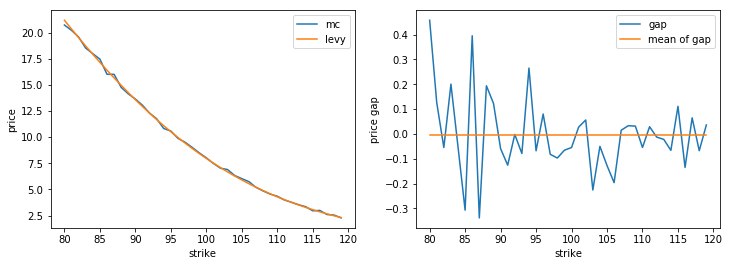

In [63]:
# A trivial test case 2

# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1

print('weights:',weights);print('cor_m: \n',cor_m)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

plotGap(mcList,levyList,'strike',strikeRange)
# write your own normal model pricing here and compare
# do the similar for BSM model

In [64]:
# A test set for basket option
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
price = 28.0073695

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.   0.5  0.5  0.5]
 [ 0.5  1.   0.5  0.5]
 [ 0.5  0.5  1.   0.5]
 [ 0.5  0.5  0.5  1. ]]
             levy         mc       gap
strike                                
80      36.398241  37.589379 -1.191137
81      35.921035  35.207081  0.713953
82      35.450670  35.417581  0.033089
83      34.987055  34.053765  0.933290
84      34.530098  34.014255  0.515844
85      34.079709  32.101583  1.978126
86      33.635796  33.214196  0.421600
87      33.198270  34.058318 -0.860048
88      32.767041  33.004697 -0.237655
89      32.342021  32.538864 -0.196843
90      31.923122  31.679434  0.243687
91      31.510255  32.074170 -0.563914
92      31.103336  30.479464  0.623871
93      30.702278  30.287850  0.414428
94      30.306996  30.969512 -0.662516
95      29.917406  29.340931  0.576476
96      29.533426  27.858015  1.675411
97      29.154973  29.519101 -0.364128
98      28.781965  28.856847 -0.074882
99      28.414323  28.361878  0.052445
100  

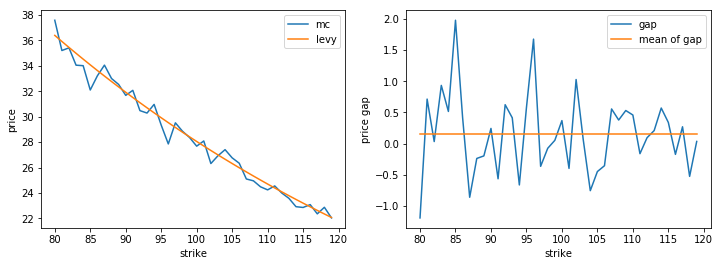

In [65]:
# MC price based on normal model
# make sure that the prices are similar
print('weights:',weights);print('cor_m: \n',cor_m)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

plotGap(mcList,levyList,'strike',strikeRange)

#we can see the levy method much less volatile than mc model when the vol gets higher

In [66]:
#test results in the paper
#standard test example
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
divr = np.zeros(4)
intr = 0
texp = 5
strike=100

            levy         mc       gap
cor_m                                
0.10   22.064965  21.953097  0.111868
0.30   25.173879  25.182058 -0.008178
0.50   28.051966  27.636910  0.415056
0.70   30.750998  30.277225  0.473773
0.80   32.043491  30.019317  2.024174
0.95   33.918719  33.123387  0.795332
-----std-----
levy    4.460747
mc      4.003599
gap     0.737187
dtype: float64


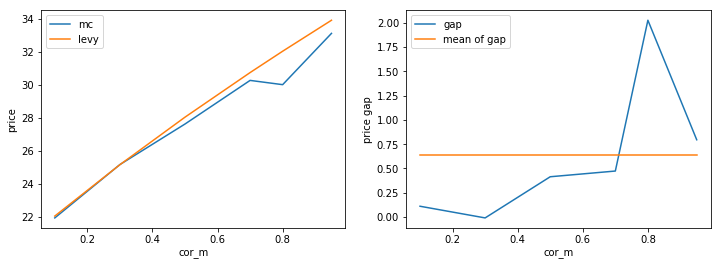

In [67]:
#(a),varing the correlations

corRange= [0.1,0.3,0.5,0.7,0.8,0.95]
mcList=[]
levyList=[]

for i in corRange:
    cor_m=(1-i)*np.identity(4) + i*np.ones((4,4))
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

plotGap(mcList,levyList,'cor_m',corRange)

             levy         mc       gap
strike                                
50      57.178289  57.836858 -0.658569
60      51.216091  50.115139  1.100952
70      46.004195  44.483843  1.520352
80      41.442261  41.161823  0.280438
90      37.439973  37.243296  0.196677
100     33.918719  33.941335 -0.022616
110     30.811178  31.294683 -0.483505
120     28.060128  27.723109  0.337018
130     25.617067  25.463326  0.153741
140     23.440897  23.148847  0.292050
150     21.496738  22.297975 -0.801237
-----std-----
levy    11.755712
mc      11.553806
gap      0.695694
dtype: float64


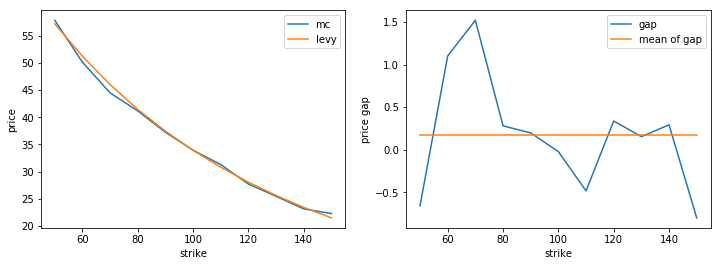

In [68]:
#(b),varing the strike
strikeRange= range(50,160,10)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

plotGap(mcList,levyList,'strike',strikeRange)

In [69]:
'''
FowardsRange= range(50,160,10)
mcList=[]
levyList=[]

for foward in FowardsRange:
    
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

plotGap(mcList,levyList,'foward',FowardsRange)
'''

"\nFowardsRange= range(50,160,10)\nmcList=[]\nlevyList=[]\n\nfor foward in FowardsRange:\n    \n    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))\n    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))\n\nplotGap(mcList,levyList,'foward',FowardsRange)\n"

           levy         mc        gap
vol                                  
0.05   0.000353   0.002431  -0.002078
0.10   0.337790   0.330607   0.007183
0.15   2.096489   2.046631   0.049858
0.20   5.086240   4.833885   0.252355
0.30  12.862270  12.014988   0.847281
0.40  21.496738  20.762894   0.733844
0.50  30.208239  28.844579   1.363660
0.60  38.649916  38.214761   0.435155
0.70  46.634545  42.250060   4.384485
0.80  54.051254  52.634832   1.416422
0.90  60.835017  62.415847  -1.580830
1.00  66.953113  55.224691  11.728422
-----std-----
levy    24.781754
mc      23.131544
gap      3.470999
dtype: float64


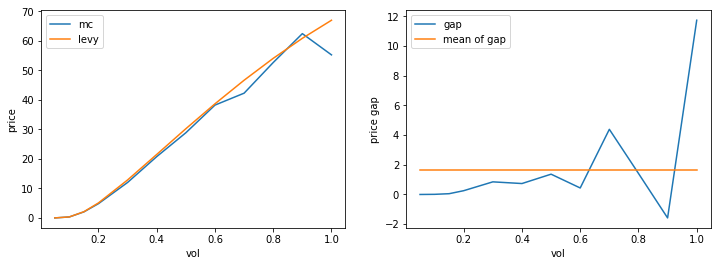

In [70]:
#(d) varing the volatility
volRange= np.append(np.arange(0.05,0.25,0.05),np.arange(0.3,1.1,0.1))
mcList=[]
levyList=[]

for vol in volRange:
    vol = np.ones(4) * vol
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

plotGap(mcList,levyList,'vol',volRange)

           levy         mc        gap
vol                                  
0.05  46.342755  15.879188  30.463567
0.10  46.507096  16.288455  30.218641
0.15  46.721938  18.294504  28.427434
0.20  46.995950  19.884699  27.111251
0.30  47.764304  23.628209  24.136094
0.40  48.910389  32.661907  16.248482
0.50  50.539780  40.482749  10.057031
0.60  52.737247  40.587755  12.149492
0.70  55.535395  50.354995   5.180400
0.80  58.900900  59.636018  -0.735118
0.90  62.747403  54.087331   8.660072
1.00  66.953113  65.451480   1.501633
-----std-----
levy     7.011478
mc      17.911167
gap     11.547160
dtype: float64


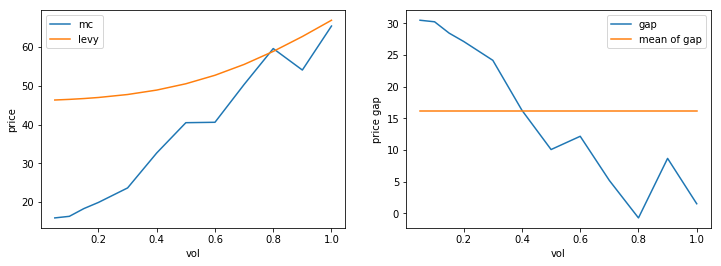

In [71]:
#(e) varing the volatility with fixed sigma_1=100%
volRange= np.append(np.arange(0.05,0.25,0.05),np.arange(0.3,1.1,0.1))
mcList=[]
levyList=[]

for vol in volRange:
    vol = np.array([1,vol,vol,vol])
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

plotGap(mcList,levyList,'vol',volRange)

           levy         mc        gap
vol                                  
0.05   0.000353   0.002561  -0.002208
0.10   0.148030   0.183253  -0.035223
0.15   1.051456   1.258223  -0.206767
0.20   2.860807   3.056842  -0.196035
0.30   8.395565   8.217694   0.177871
0.40  15.504052  13.042254   2.461798
0.50  23.540779  21.495329   2.045450
0.60  32.053819  28.220333   3.833485
0.70  40.621697  32.855217   7.766480
0.80  48.872287  40.328418   8.543869
0.90  56.537524  45.798022  10.739501
1.00  63.469089  51.484996  11.984093
-----std-----
levy    23.371382
mc      18.878486
gap      4.596057
dtype: float64


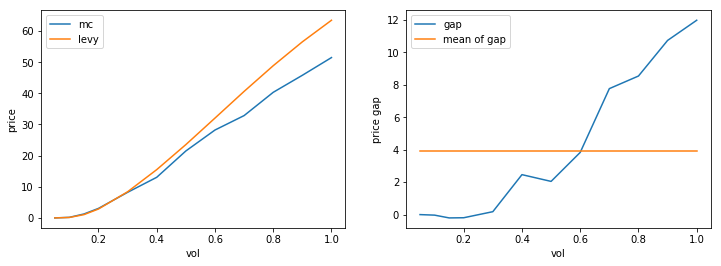

In [72]:
#(f) varing the volatility with fixed sigma_1=5%
volRange= np.append(np.arange(0.05,0.25,0.05),np.arange(0.3,1.1,0.1))
mcList=[]
levyList=[]

for vol in volRange:
    vol = np.array([0.05,vol,vol,vol])
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

plotGap(mcList,levyList,'vol',volRange)